In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("accidents_2012_to_2014.csv", low_memory=False)

In [4]:
print(len(data.columns))
print(data.columns)

33
Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location', 'Year'],
      dtype='object')


In [5]:
data = data.drop(columns=['Accident_Index',
                          'Special_Conditions_at_Site',
                          'Carriageway_Hazards',
                          'Junction_Detail',
                          'LSOA_of_Accident_Location',
                          'Location_Easting_OSGR',
                          'Location_Northing_OSGR',
                          '1st_Road_Class',
                          '1st_Road_Number',
                          '2nd_Road_Class',
                          '2nd_Road_Number',
                          'Longitude',
                          'Latitude',
                          'Local_Authority_(District)',
                          'Local_Authority_(Highway)'
                         ])

In [6]:
data.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [7]:
data.head()

,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Road_Type,Speed_limit,Junction_Control,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,1,3,2,1,19/01/2012,5,20:35,Single carriageway,30,Automatic traffic signal,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
1,1,3,2,1,04/01/2012,4,17:00,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012
2,1,3,2,1,10/01/2012,3,10:07,One way street,30,Giveway or uncontrolled,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
3,1,3,1,1,18/01/2012,4,12:20,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes,2012
4,1,3,1,1,17/01/2012,3,20:24,Single carriageway,30,Giveway or uncontrolled,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes,2012


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464697 entries, 0 to 464696
Data columns (total 18 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Police_Force                                 464697 non-null  int64 
 1   Accident_Severity                            464697 non-null  int64 
 2   Number_of_Vehicles                           464697 non-null  int64 
 3   Number_of_Casualties                         464697 non-null  int64 
 4   Date                                         464697 non-null  object
 5   Day_of_Week                                  464697 non-null  int64 
 6   Time                                         464684 non-null  object
 7   Road_Type                                    464697 non-null  object
 8   Speed_limit                                  464697 non-null  int64 
 9   Junction_Control                             286087 non-null  object
 

In [9]:
data = data.dropna()
data.isnull().sum()

Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Road_Type                                      0
Speed_limit                                    0
Junction_Control                               0
Pedestrian_Crossing-Human_Control              0
Pedestrian_Crossing-Physical_Facilities        0
Light_Conditions                               0
Weather_Conditions                             0
Road_Surface_Conditions                        0
Urban_or_Rural_Area                            0
Did_Police_Officer_Attend_Scene_of_Accident    0
Year                                           0
dtype: int64

In [10]:
data.reset_index(drop = True, inplace=True)
data.index

RangeIndex(start=0, stop=285628, step=1)

In [11]:
def cat_summary(data, cat_length, plot = False):

    print("# How many classes are there in variables?")
    print("----------------------------------------------------------------------------------")
    
    cat_names_less = [col for col in data.columns if len(data[col].unique()) < cat_length]
    cat_names_more = [col for col in data.columns if len(data[col].unique()) >= cat_length]
    print('Number of Classes <', str(cat_length) + ":", cat_names_less)
    print('Number of Classes >=', str(cat_length) + ":", cat_names_more, "\n\n")
    
    print("# Which variables are object variables that number of classes is more than", str(cat_length) + "?")
    print("----------------------------------------------------------------------------------")
    object_variables = [col for col in cat_names_more if data[col].dtype == "O"]
    more = [col for col in object_variables if len(data[col].unique()) >= cat_length]
    print('Number of Classes >', str(cat_length) + ":", more, "\n\n")
    
    print("# Number of Unique Classes")
    print("----------------------------------------------------------------------------------")
    for  i in data.columns:
        print(i, "(",str(data[i].dtypes),"):",data[i].nunique())
    print("\n\n")
    
    
    if plot:
        print("# Stats & Visualization")
    else:
        print("# Stats")
    print("-----------------------------------------------------------------------------------")
    
    for col in cat_names_less:
        print(pd.DataFrame({col: data[col].value_counts(),
                           "Ratio": 100 * data[col].value_counts()/ len (data)}), end = "\n\n\n")
        
        if plot:
            chart = sns.countplot(x = col, data = data)
            chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
            plt.show()
            
        print("#------------------------------------------------------------------------------ \n")
        

# How many classes are there in variables?
----------------------------------------------------------------------------------
Number of Classes < 10: ['Accident_Severity', 'Day_of_Week', 'Road_Type', 'Speed_limit', 'Junction_Control', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident', 'Year']
Number of Classes >= 10: ['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Time'] 


# Which variables are object variables that number of classes is more than 10?
----------------------------------------------------------------------------------
Number of Classes > 10: ['Date', 'Time'] 


# Number of Unique Classes
----------------------------------------------------------------------------------
Police_Force ( int64 ): 51
Accident_Severity ( int64 ): 3
Number_of_Vehicles ( int64 ): 15
Number_of_Casualties ( i

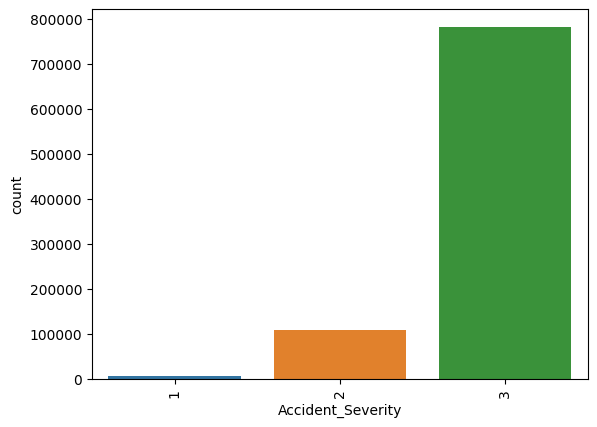

#------------------------------------------------------------------------------ 

             Day_of_Week      Ratio
Day_of_Week                        
6                 148738  16.552855
4                 138407  15.403132
5                 137546  15.307313
3                 136876  15.232749
2                 128605  14.312280
7                 116601  12.976371
1                  91791  10.215299




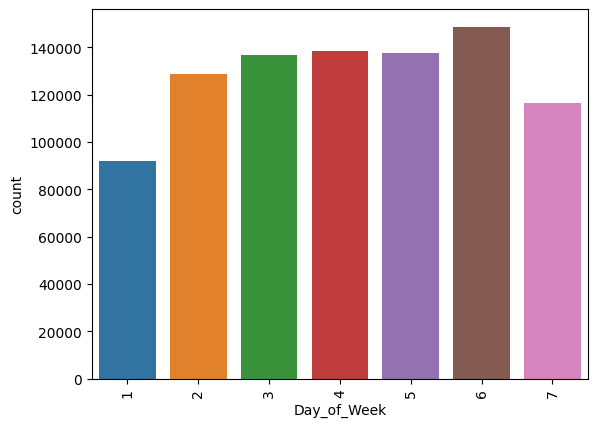

#------------------------------------------------------------------------------ 

                    Road_Type      Ratio
Road_Type                               
Single carriageway     669338  74.489741
Roundabout              99278  11.048517
Dual carriageway        94787  10.548720
One way street          19738   2.196616
Slip road               11403   1.269025
Unknown                  4020   0.447380




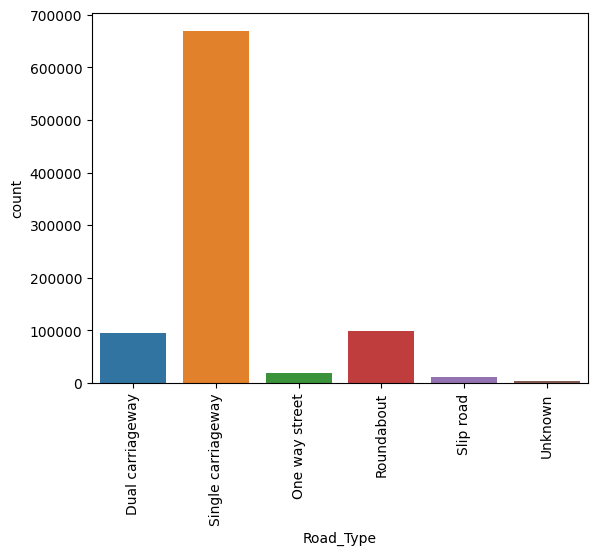

#------------------------------------------------------------------------------ 

             Speed_limit      Ratio
Speed_limit                        
30                672619  74.854880
60                 87599   9.748777
40                 76688   8.534506
70                 27726   3.085590
50                 23782   2.646667
20                 10147   1.129246
10                     2   0.000223
15                     1   0.000111




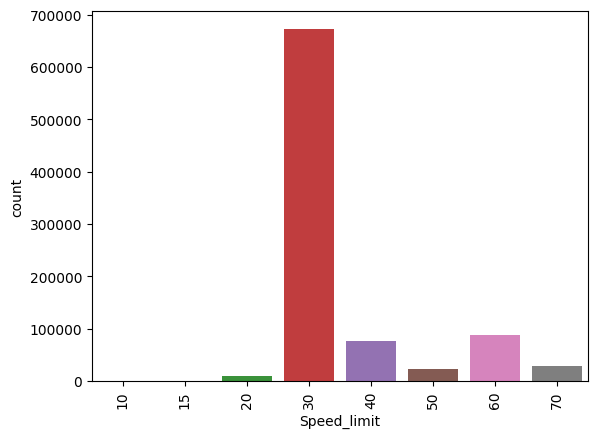

#------------------------------------------------------------------------------ 

                          Junction_Control      Ratio
Junction_Control                                     
Giveway or uncontrolled             731786  81.439497
Automatic traffic signal            155160  17.267551
Stop Sign                             9147   1.017958
Authorised person                     2471   0.274994




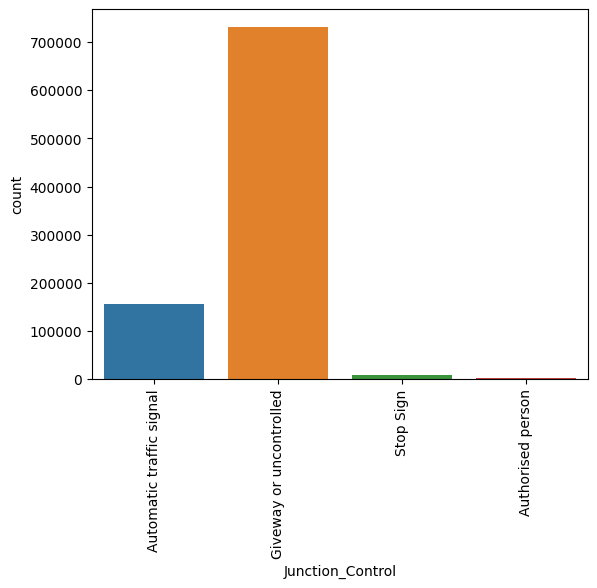

#------------------------------------------------------------------------------ 

                                    Pedestrian_Crossing-Human_Control   
Pedestrian_Crossing-Human_Control                                       
None within 50 metres                                          892087  \
Control by other authorised person                               4097   
Control by school crossing patrol                                2380   

                                        Ratio  
Pedestrian_Crossing-Human_Control              
None within 50 metres               99.279183  
Control by other authorised person   0.455950  
Control by school crossing patrol    0.264867  




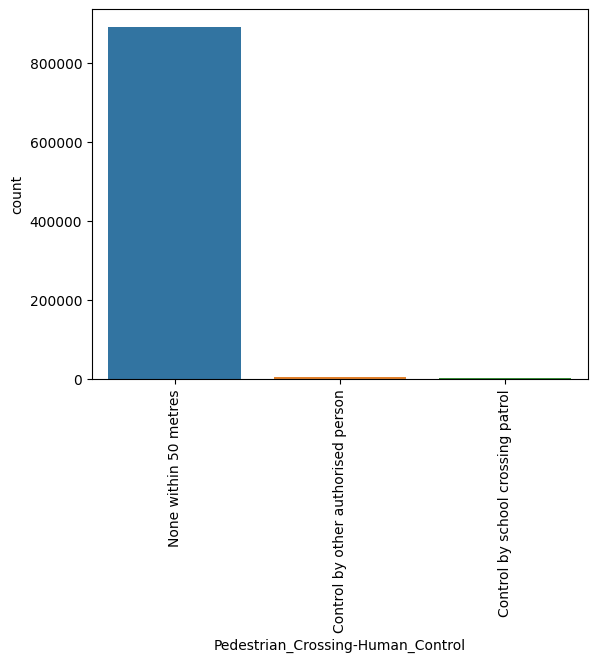

#------------------------------------------------------------------------------ 

                                             Pedestrian_Crossing-Physical_Facilities   
Pedestrian_Crossing-Physical_Facilities                                                
No physical crossing within 50 meters                                         693578  \
Pedestrian phase at traffic signal junction                                    92478   
non-junction pedestrian crossing                                               57021   
Zebra crossing                                                                 30153   
Central refuge                                                                 22031   
Footbridge or subway                                                            3303   

                                                 Ratio  
Pedestrian_Crossing-Physical_Facilities                 
No physical crossing within 50 meters        77.187379  
Pedestrian phase at traffic signal junctio

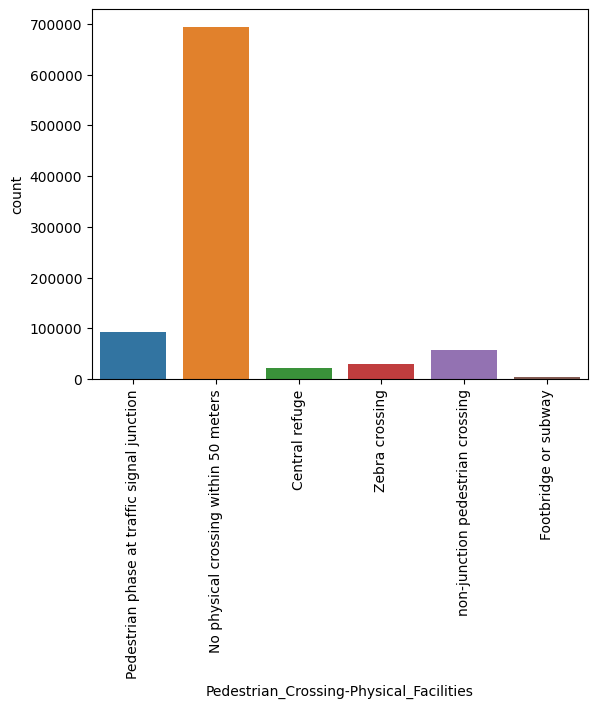

#------------------------------------------------------------------------------ 

                                           Light_Conditions      Ratio
Light_Conditions                                                      
Daylight: Street light present                       668662  74.414510
Darkness: Street lights present and lit              198842  22.128863
Darkeness: No street lighting                         18029   2.006424
Darkness: Street lighting unknown                      9100   1.012727
Darkness: Street lights present but unlit              3931   0.437476




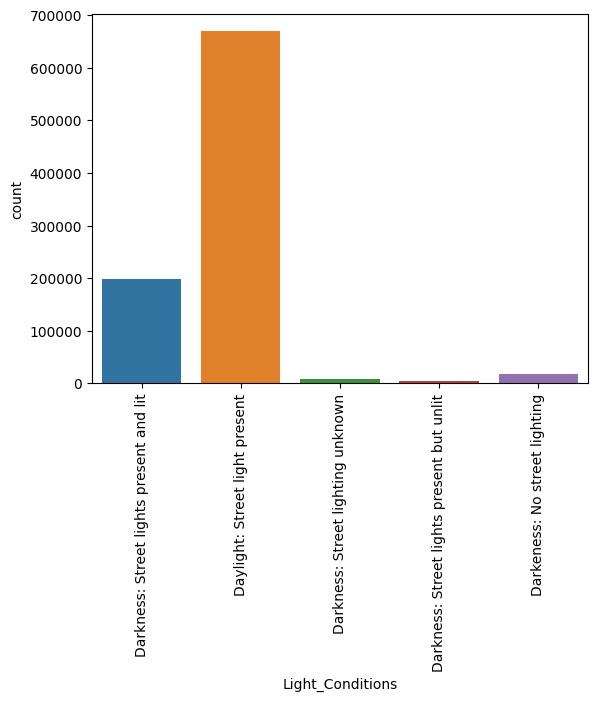

#------------------------------------------------------------------------------ 

                            Weather_Conditions      Ratio
Weather_Conditions                                       
Fine without high winds                 729511  81.186315
Raining without high winds              104250  11.601845
Other                                    18284   2.034802
Unknown                                  15964   1.776612
Raining with high winds                  10786   1.200360
Fine with high winds                      9910   1.102871
Snowing without high winds                5319   0.591944
Fog or mist                               3883   0.432134
Snowing with high winds                    657   0.073117




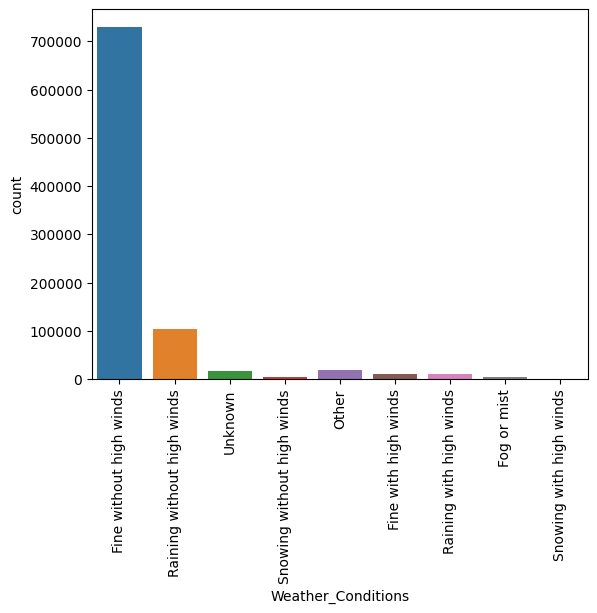

#------------------------------------------------------------------------------ 

                           Road_Surface_Conditions      Ratio
Road_Surface_Conditions                                      
Dry                                         641304  71.369875
Wet/Damp                                    240605  26.776612
Frost/Ice                                    11742   1.306752
Snow                                          4430   0.493009
Flood (Over 3cm of water)                      483   0.053752




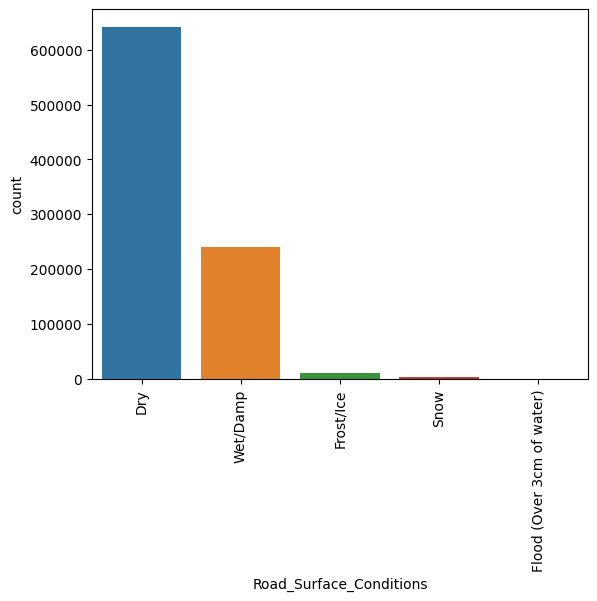

#------------------------------------------------------------------------------ 

                     Urban_or_Rural_Area      Ratio
Urban_or_Rural_Area                                
1                                 677723  75.422897
2                                 220791  24.571539
3                                     50   0.005564




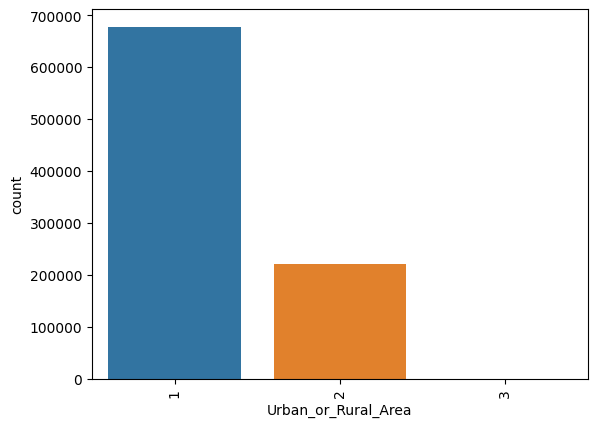

#------------------------------------------------------------------------------ 

                                             Did_Police_Officer_Attend_Scene_of_Accident   
Did_Police_Officer_Attend_Scene_of_Accident                                                
Yes                                                                               715618  \
No                                                                                182946   

                                                 Ratio  
Did_Police_Officer_Attend_Scene_of_Accident             
Yes                                          79.640181  
No                                           20.359819  




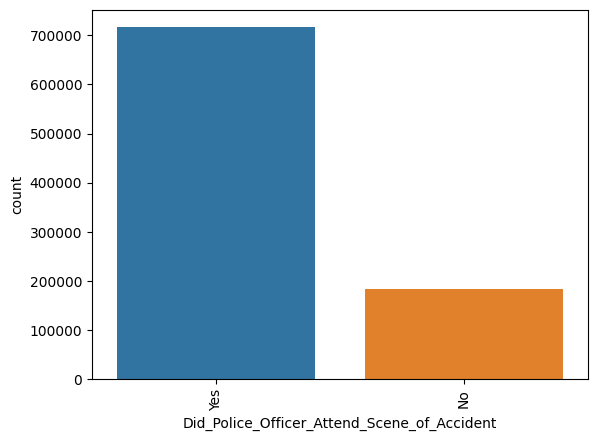

#------------------------------------------------------------------------------ 

        Year      Ratio
Year                   
2005  115734  12.879884
2012  112224  12.489261
2006  110171  12.260785
2007  105438  11.734056
2009   96870  10.780534
2011   92601  10.305443
2010   92122  10.252136
2014   89717   9.984486
2013   83687   9.313416




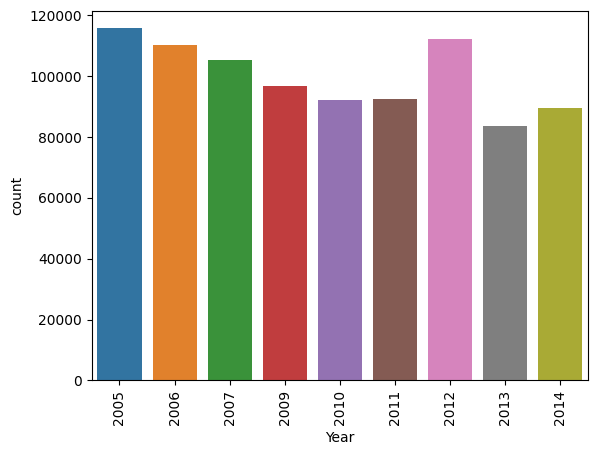

#------------------------------------------------------------------------------ 



In [13]:
cat_summary(data, cat_length=10,plot=True)

## inceleme

In [12]:
data["Number_of_Vehicles"].value_counts()

2     197773
1      65148
3      18755
4       3198
5        553
6        142
7         42
8         12
10         3
11         1
9          1
Name: Number_of_Vehicles, dtype: int64

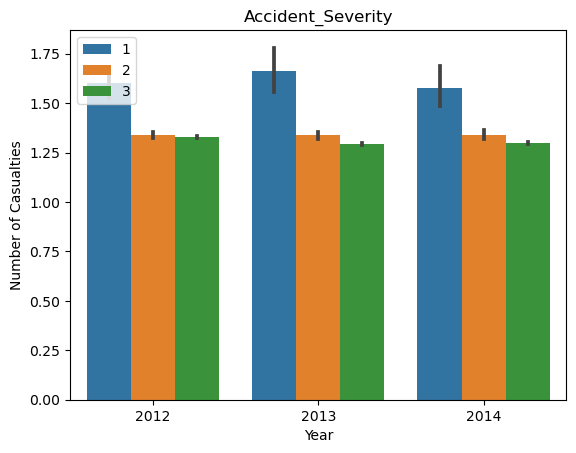

In [13]:
sns.barplot(x="Year",y="Number_of_Casualties",data=data,hue="Accident_Severity")
plt.title("Accident_Severity")
plt.ylabel("Number of Casualties")
plt.legend(loc="upper left")
plt.show()

In [14]:
x = data.groupby(by="Road_Type").aggregate({"Number_of_Casualties" : "sum"})
x

,Number_of_Casualties
Road_Type,
Dual carriageway,41377
One way street,6870
Roundabout,39415
Single carriageway,282063
Slip road,4888
Unknown,1010


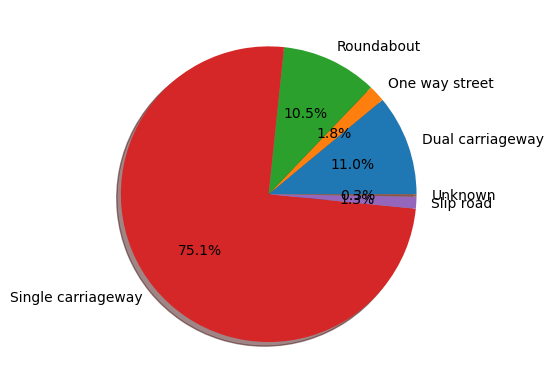

In [15]:
fig, ax = plt.subplots()
ax.pie(x["Number_of_Casualties"], labels=x.index, autopct='%1.1f%%',
        shadow=True)
plt.show()

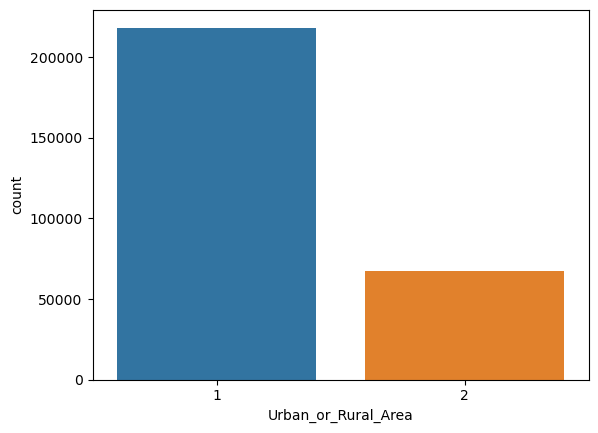

In [16]:
# Rural and Urban area.
urban_rural = data.groupby(by="Urban_or_Rural_Area").aggregate({"Number_of_Casualties" : "sum"})
sns.countplot(x ='Urban_or_Rural_Area', data = data)
# Show the plot
plt.show()

In [17]:
data.columns

Index(['Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week', 'Time', 'Road_Type',
       'Speed_limit', 'Junction_Control', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

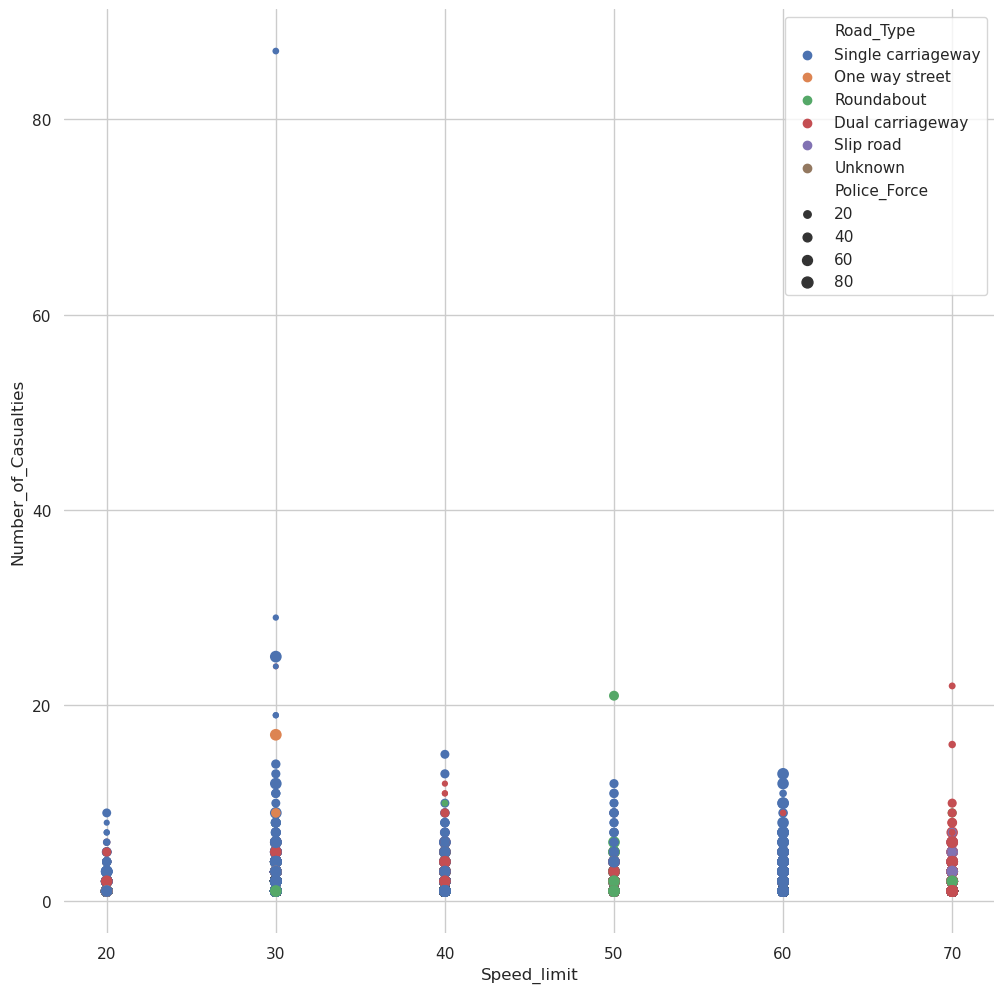

In [18]:
# What effects number of accidents.
sns.set_theme(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(12, 12))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x="Speed_limit", y="Number_of_Casualties",
                hue="Road_Type", size="Police_Force",
                linewidth=0,
                data=data, ax=ax)
plt.legend(loc='upper right')
plt.show()

In [1]:
# denem yapıyoruz.
